In [64]:
from protocol import*
import serial

import matplotlib.pyplot as plt
import numpy as np

import matplotlib.colors as mcolors
import matplotlib.animation as animation

import time
from time import time

#### Connecting  via USB

In [65]:
baud_rate = 115200
data_bits = 8
stop_bits = 1
Parity = serial.PARITY_NONE

Ports can be known from script 

port_script.sh

In [149]:
portRACK = '/dev/ttyUSB0'
portLST1 = '/dev/ttyUSB1'
portLST2 = '/dev/ttyUSB2'

Addresses inside rack

In [150]:
motherboard=0x11
MST_xy=0x22 # bay address
MST_z = 0x24 # bay address

MNA_t=0x25 # bay PIEZO 1 xy
MNA_t2=0x26 # bay PIEZO 2 z
# destination = 0x24 #Destination byte; 0x21 for channel 1, 0x22 for channel 2, 0x23 for channel 3

source = 0x01 #Source byte


- 0x11 - MMR601 (motherboard)
- 0x21 - 
- 0x22 - MST602
- 0x23 -
- 0x24 - MST602
- 0x25 - MNA601
- 0x26 - MNA601
- 0x27 - 
- ...


In [151]:
LST1=serial.Serial(port=portLST1,
                  baudrate=baud_rate,
                  parity=Parity,
                  stopbits=stop_bits,
                  timeout=0.1)

In [152]:
LST2=serial.Serial(port=portLST2,
                  baudrate=baud_rate,
                  parity=Parity,
                  stopbits=stop_bits,
                  timeout=0.1)


Connecting

In [153]:

Device = serial.Serial(port=portRACK, 
                       baudrate=baud_rate, 
                       bytesize=data_bits, 
                       parity=Parity, 
                       stopbits=stop_bits,
                       timeout=0.1)

### Collecting devices info

In [154]:
get_device_info(LST1, motherboard, source)
get_device_info(LST2, motherboard, source)

get_device_info(Device, MST_xy, source)
get_device_info(Device, MST_z, source)
get_device_info(Device, MNA_t, source)
get_device_info(Device, MNA_t2, source)

Model is  LTS150
Number of channels =  1
Model is  LTS150
Number of channels =  1
Model is  MST602
Number of channels =  2
Model is  MST602
Number of channels =  2
Model is  MNA601
Number of channels =  2
Model is  MNA601
Number of channels =  2


### Turn on all motors + piezo

In [155]:
enable_motor(Device, MST_xy, source, 0x01)
enable_motor(Device, MST_xy, source, 0x02) #second motor (drv) in bay (mst)
enable_motor(Device, MST_z, source, 0x01)


enable_motor(LST1, motherboard, source, 0x01)
enable_motor(LST2, motherboard, source, 0x01)

enable_motor(Device, MNA_t, source, 0x01)
enable_motor(Device, MNA_t, source, 0x02) #
enable_motor(Device, MNA_t2, source, 0x02)
enable_motor(Device, MNA_t2, source, 0x01)

Stage Enabled
Stage Enabled
Stage Enabled
Stage Enabled
Stage Enabled
Stage Enabled
Stage Enabled
Stage Enabled
Stage Enabled


### Set up backlash distance

In [156]:
get_backlash_distant(Device, MST_xy, source, 0x01, mst_consts)
get_backlash_distant(Device, MST_xy, source, 0x02, mst_consts)
get_backlash_distant(Device, MST_z, source, 0x01, mst_consts)

get_backlash_distant(LST1, motherboard, source, 0x01, LST_consts)
get_backlash_distant(LST2, motherboard, source, 0x01, LST_consts)

Backlash: 0.0000 mm
Backlash: 0.0000 mm
Backlash: 0.0000 mm
Backlash: 0.0500 mm
Backlash: 0.0500 mm


In [157]:
set_backlash_distant(Device, MST_xy, source, 0x0001, 0.01, mst_consts)
set_backlash_distant(Device, MST_xy, source, 0x0002, 0.01, mst_consts)
set_backlash_distant(Device, MST_z, source, 0x0001, 0.01, mst_consts)


set_backlash_distant(LST1, motherboard, source, 0x0001, 0.05, LST_consts)
set_backlash_distant(LST2, motherboard, source, 0x0001, 0.05, LST_consts)

In [158]:
get_backlash_distant(Device, MST_xy, source, 0x01, mst_consts)
get_backlash_distant(Device, MST_xy, source, 0x02, mst_consts)
get_backlash_distant(Device, MST_z, source, 0x01, mst_consts)

get_backlash_distant(LST1, motherboard, source, 0x01, LST_consts)
get_backlash_distant(LST2, motherboard, source, 0x01, LST_consts)

Backlash: 0.0100 mm
Backlash: 0.0100 mm
Backlash: 0.0100 mm
Backlash: 0.0500 mm
Backlash: 0.0500 mm


### Correct power parameters 
Power when motor does not move should be significantly smaller.

This is availible only for mst controllers. Move power is calculated automatically, so setting it up makes no sense (see protocol).

In [159]:
get_power_params(Device, MST_xy, source, 0x01)
print("\n")
get_power_params(Device, MST_xy, source, 0x02)
print("\n")
get_power_params(Device, MST_z, source, 0x01)

Rest power = 1 %
Move power = 2 %
Rest power (hex) = 0x1 %
Move power (hex) = 0x2 %


Rest power = 1 %
Move power = 2 %
Rest power (hex) = 0x1 %
Move power (hex) = 0x2 %


Rest power = 1 %
Move power = 2 %
Rest power (hex) = 0x1 %
Move power (hex) = 0x2 %


In [160]:
set_power_params(Device, MST_xy, source, 0x0001, 6, 30)
set_power_params(Device, MST_xy, source, 0x0002, 6, 30)
set_power_params(Device, MST_z, source, 0x0001, 6, 30)

In [161]:
get_power_params(Device, MST_xy, source, 0x01)
print("\n")
get_power_params(Device, MST_xy, source, 0x02)
print("\n")
get_power_params(Device, MST_z, source, 0x01)

Rest power = 129 %
Move power = 2 %
Rest power (hex) = 0x81 %
Move power (hex) = 0x2 %


Rest power = 129 %
Move power = 2 %
Rest power (hex) = 0x81 %
Move power (hex) = 0x2 %


Rest power = 129 %
Move power = 2 %
Rest power (hex) = 0x81 %
Move power (hex) = 0x2 %


### Set up homing parameters (velocity, offset from border)

In [162]:
get_home_params(Device, MST_xy, source, 0x01, mst_consts)
print("\n")
get_home_params(Device, MST_xy, source, 0x02, mst_consts)
print("\n")
get_home_params(Device, MST_z, source, 0x01, mst_consts)
print("\n")
get_home_params(LST1, motherboard, source, 0x01, LST_consts)
print("\n")
get_home_params(LST2, motherboard, source, 0x01, LST_consts)

Direction of homing (1=forward, 2=reverse) =  2
Limit switch (1=hardware reverse, 4=hardware forward) =  1
Homing velocity (mm/sec) =  0.0
Offset distance (mm) =  0.015625


Direction of homing (1=forward, 2=reverse) =  2
Limit switch (1=hardware reverse, 4=hardware forward) =  1
Homing velocity (mm/sec) =  0.0
Offset distance (mm) =  0.015625


Direction of homing (1=forward, 2=reverse) =  2
Limit switch (1=hardware reverse, 4=hardware forward) =  1
Homing velocity (mm/sec) =  0.0
Offset distance (mm) =  0.015625


Direction of homing (1=forward, 2=reverse) =  2
Limit switch (1=hardware reverse, 4=hardware forward) =  1
Homing velocity (mm/sec) =  1.9998999878475456
Offset distance (mm) =  20.0


Direction of homing (1=forward, 2=reverse) =  2
Limit switch (1=hardware reverse, 4=hardware forward) =  1
Homing velocity (mm/sec) =  1.9998999878475456
Offset distance (mm) =  20.0


In [163]:
set_home_params(Device, MST_xy, source, 0x0001, 0.9999, 3.0, mst_consts)
set_home_params(Device, MST_xy, source, 0x0002, 0.9999, 3.0, mst_consts)
set_home_params(Device, MST_z, source, 0x0001, 0.9999, 3.0, mst_consts)

set_home_params(LST1, motherboard, source, 0x0001, 1.9999, 20.0, LST_consts)
set_home_params(LST2, motherboard, source, 0x0001, 1.9999, 20.0, LST_consts)

In [164]:
get_home_params(Device, MST_xy, source, 0x01, mst_consts)
print("\n")
get_home_params(Device, MST_xy, source, 0x02, mst_consts)
print("\n")
get_home_params(Device, MST_z, source, 0x01, mst_consts)
print("\n")
get_home_params(LST1, motherboard, source, 0x01, LST_consts)
print("\n")
get_home_params(LST2, motherboard, source, 0x01, LST_consts)

Direction of homing (1=forward, 2=reverse) =  2
Limit switch (1=hardware reverse, 4=hardware forward) =  1
Homing velocity (mm/sec) =  0.9998999878475456
Offset distance (mm) =  3.0


Direction of homing (1=forward, 2=reverse) =  2
Limit switch (1=hardware reverse, 4=hardware forward) =  1
Homing velocity (mm/sec) =  0.9998999878475456
Offset distance (mm) =  3.0


Direction of homing (1=forward, 2=reverse) =  2
Limit switch (1=hardware reverse, 4=hardware forward) =  1
Homing velocity (mm/sec) =  0.9998999878475456
Offset distance (mm) =  3.0


Direction of homing (1=forward, 2=reverse) =  2
Limit switch (1=hardware reverse, 4=hardware forward) =  1
Homing velocity (mm/sec) =  1.9998999878475456
Offset distance (mm) =  20.0


Direction of homing (1=forward, 2=reverse) =  2
Limit switch (1=hardware reverse, 4=hardware forward) =  1
Homing velocity (mm/sec) =  1.9998999878475456
Offset distance (mm) =  20.0


### Set up velocity parameters (max/min velocity, acceleration)

In [165]:
get_velocity_params(Device, MST_xy, source, 0x01, mst_consts)
print("\n")
get_velocity_params(Device, MST_xy, source, 0x02, mst_consts)
print("\n")
get_velocity_params(Device, MST_z, source, 0x01, mst_consts)
print("\n")
get_velocity_params(LST1, motherboard, source, 0x01, LST_consts)
print("\n")
get_velocity_params(LST2, motherboard, source, 0x01, LST_consts)

Min velocity: 0.0000 mm/sec
Max velocity: 0.0000 mm/sec
Acceleration: 0.0000 mm/sec/sec


Min velocity: 0.0000 mm/sec
Max velocity: 0.0000 mm/sec
Acceleration: 0.0000 mm/sec/sec


Min velocity: 0.0000 mm/sec
Max velocity: 0.0000 mm/sec
Acceleration: 0.0000 mm/sec/sec


Min velocity: 0.0000 mm/sec
Max velocity: 9.9999 mm/sec
Acceleration: 0.0000 mm/sec/sec


Min velocity: 0.0000 mm/sec
Max velocity: 9.9999 mm/sec
Acceleration: 0.0000 mm/sec/sec


In [166]:
set_velocity_params(Device, MST_xy, source, 0x0001, 0.0, 0.9999, 0.5, mst_consts)
set_velocity_params(Device, MST_xy, source, 0x0002, 0.0, 0.9999, 0.5, mst_consts)
set_velocity_params(Device, MST_z, source, 0x0001, 0.0, 0.9999, 0.5, mst_consts)


set_velocity_params(LST1, motherboard, source, 0x0001, 0.0, 9.9999, 1.9, LST_consts)
set_velocity_params(LST2, motherboard, source, 0x0001, 0.0, 9.9999, 1.9, LST_consts)

0 43970258 4506
0 43970258 4506
0 43970258 4506
0 219871081 8561
0 219871081 8561


In [167]:
get_velocity_params(Device, MST_xy, source, 0x01, mst_consts)
print("\n")
get_velocity_params(Device, MST_xy, source, 0x02, mst_consts)
print("\n")
get_velocity_params(Device, MST_z, source, 0x01, mst_consts)
print("\n")
#get_velocity_params(LST1, motherboard, source, 0x01, LST_consts)
print("\n")
#get_velocity_params(LST2, motherboard, source, 0x01, LST_consts)

Min velocity: 0.0000 mm/sec
Max velocity: 0.9999 mm/sec
Acceleration: 0.0000 mm/sec/sec


Min velocity: 0.0000 mm/sec
Max velocity: 0.9999 mm/sec
Acceleration: 0.0000 mm/sec/sec


Min velocity: 0.0000 mm/sec
Max velocity: 0.9999 mm/sec
Acceleration: 0.0000 mm/sec/sec






### Set up stage limits and limit switches

In [168]:
get_limit_switch_params(Device, MST_xy, source, 0x01, mst_consts)
print("\n")
get_limit_switch_params(Device, MST_xy, source, 0x02, mst_consts)
print("\n")
get_limit_switch_params(Device, MST_z, source, 0x01, mst_consts)
print("\n")
#get_limit_switch_params(LST1, motherboard, source, 0x01, LST_consts)
print("\n")
#get_limit_switch_params(LST2, motherboard, source, 0x01, LST_consts)

1 = ignore/not present, 2 = make switch on contact
CW hard limit switch = 2
CCW hard limit switch = 2
CW soft limit = 0.0
CCW soft limit = 0.0
Soft limit switch = 1


1 = ignore/not present, 2 = make switch on contact
CW hard limit switch = 2
CCW hard limit switch = 2
CW soft limit = 0.0
CCW soft limit = 0.0
Soft limit switch = 1


1 = ignore/not present, 2 = make switch on contact
CW hard limit switch = 2
CCW hard limit switch = 2
CW soft limit = 0.0
CCW soft limit = 0.0
Soft limit switch = 1






In [169]:
set_limit_switch_params(Device, MST_xy, source, 0x0001, 2, 1, 4.0, 0.0, mst_consts)
set_limit_switch_params(Device, MST_xy, source, 0x0002, 2, 1, 4.0, 0.0, mst_consts)
set_limit_switch_params(Device, MST_z,  source, 0x0001, 2, 1, 4.0, 0.0, mst_consts)


#set_limit_switch_params(LST1, motherboard, source, 0x0001, 2, 2, 150.0, 0.0, LST_consts)
#set_limit_switch_params(LST2, motherboard, source, 0x0001, 2, 2, 150.0, 0.0, LST_consts)

In [170]:
get_limit_switch_params(Device, MST_xy, source, 0x01, mst_consts)
print("\n")
get_limit_switch_params(Device, MST_xy, source, 0x02, mst_consts)
print("\n")
get_limit_switch_params(Device, MST_z, source, 0x01, mst_consts)
print("\n")
#get_limit_switch_params(LST1, motherboard, source, 0x01, LST_consts)
print("\n")
#get_limit_switch_params(LST2, motherboard, source, 0x01, LST_consts)

1 = ignore/not present, 2 = make switch on contact
CW hard limit switch = 2
CCW hard limit switch = 1
CW soft limit = 4.0
CCW soft limit = 0.0
Soft limit switch = 2


1 = ignore/not present, 2 = make switch on contact
CW hard limit switch = 2
CCW hard limit switch = 1
CW soft limit = 4.0
CCW soft limit = 0.0
Soft limit switch = 2


1 = ignore/not present, 2 = make switch on contact
CW hard limit switch = 2
CCW hard limit switch = 1
CW soft limit = 4.0
CCW soft limit = 0.0
Soft limit switch = 2






## Homing all motors - DIDN'T RUN THIS BLOCK becouse of construction

In [171]:
#move_home(Device, MST_xy, source, 0x01)
#move_home(Device, MST_xy, source, 0x02)
#move_home(Device, MST_z, source, 0x01)

In [172]:
# move_home(LST1, motherboard, source, 0x01)
# move_home(LST2, motherboard, source, 0x01)


In [173]:
get_current_position(Device, MST_xy, source, 0x01, mst_consts)


Position: 0.0000 mm


0.0

In [174]:
get_current_position(Device, MST_xy, source, 0x02, mst_consts)


Position: 0.0000 mm


0.0

In [175]:
get_current_position(Device, MST_z, source, 0x01, mst_consts)

Position: 0.0000 mm


0.0

### Get current position of motors

Strange behaviour sometimes, maybe zero position should be corrected

In [176]:
get_current_position(Device, MST_xy, source, 0x01, mst_consts)
get_current_position(Device, MST_xy, source, 0x02, mst_consts)
get_current_position(Device, MST_z, source, 0x01, mst_consts)


get_current_position(LST1, motherboard, source, 0x01, LST_consts)
get_current_position(LST2, motherboard, source, 0x01, LST_consts)

Position: 0.0000 mm
Position: 0.0000 mm
Position: 0.0000 mm
Position: 0.0000 mm
Position: 0.0000 mm


0.0

### Small moves to test
Here you can find examples of moving commands

In [177]:
#move_relative(Device, MST_xy, source, 0x0001, -0.1, mst_consts)
#move_relative(Device, MST_xy, source, 0x0002, -1, mst_consts)
#move_absolute(Device, MST_z, source, 0x0001, 1, mst_consts)
#move_absolute(LST1, motherboard, source, 0x0001, 55.00, LST_consts)
#move_absolute(LST2, motherboard, source, 0x0001, 75.00, LST_consts)

# Nanotrack (piezo) mode
Switch on piezo mode and track how it works

In [178]:
# See in what mode nanotrck is
get_nt_mode(Device, MNA_t, source)
get_nt_mode(Device, MNA_t2, source)
get_scan_circle_params(Device, MNA_t, source)
get_scan_circle_params(Device, MNA_t2, source)

See protocol for description
Nanotrack state = 1
Nanotrack mode = 0
See protocol for description
Nanotrack state = 1
Nanotrack mode = 0
See protocol for descriprion
Circle diameter adjustment mode = 1
Circle diameter = 12000 (makes sense only if mode = 0x01)
Circle frequency = 58.333333333333336 Hz
Minimum circle diameter = 0 (if mode = 0x02)
Maximum circle diameter = 0 (if mode = 0x02)
Adjustment type of circle position = 0 (if mode = 0x02)
See protocol for descriprion
Circle diameter adjustment mode = 1
Circle diameter = 12000 (makes sense only if mode = 0x01)
Circle frequency = 58.333333333333336 Hz
Minimum circle diameter = 0 (if mode = 0x02)
Maximum circle diameter = 0 (if mode = 0x02)
Adjustment type of circle position = 0 (if mode = 0x02)


In [179]:
# Homing nanotrack to centre
set_circ_hom_pos(Device, MNA_t2, source)
move_nanotrack_home(Device, MNA_t2, source)
set_circ_hom_pos(Device, MNA_t, source)
move_nanotrack_home(Device, MNA_t, source)
# Find out current position od nanotrack
print(curent_circ_pos(Device, MNA_t, source))
print(curent_circ_pos(Device, MNA_t2, source))

(32000, 32000, 0, 0, 10, 1)
(32000, 32000, 0, 0, 10, 1)


In [180]:
# If you want to switch feedback mode on - run next comand
# Else don't run this cell
set_scan_circle_params(Device, MNA_t2, source, CircDiaMode=1, CircDiaSW=3000)
# CircDiaMode=1 - is manual mode, when all parametrs fixed, if you want other mode look in manual.
set_scan_circle_params(Device, MNA_t, source, CircDiaMode=1, CircDiaSW=3000)
set_nt_mode(Device, MNA_t, source, 0x03)
set_nt_mode(Device, MNA_t2, source, 0x02)
# I do not really anderstand, why why should put MNA_t2 in latch mode while MNA_t in piezo mode
# but in this settings it works.
# Here you can change many of parametres and find out which one is the best for you.

In [181]:
get_feedback_mode(Device, MNA_t, source) #should be 1
get_feedback_mode(Device, MNA_t2, source) #should be 1

Feedback mode = 1
Feedback mode = 1


<IPython.core.display.Javascript object>


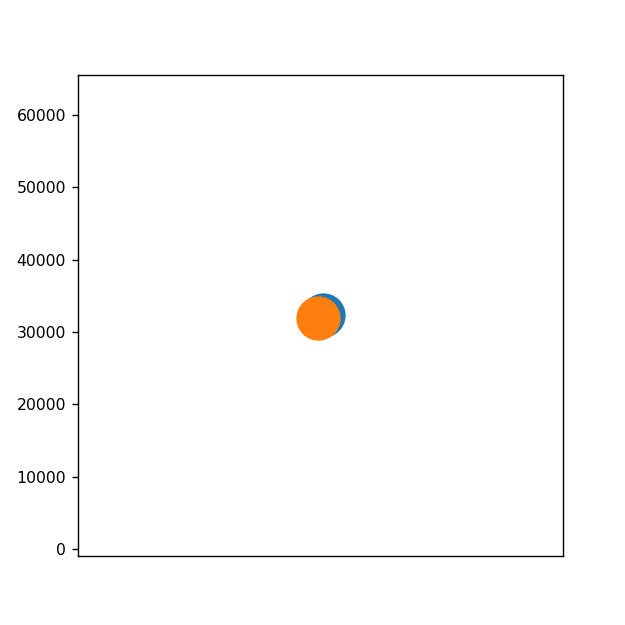

In [104]:
# Position of Piezo reall time
import matplotlib.colors as mcolors
import matplotlib.animation as animation

import time
from time import time


set_scan_circle_params(Device, MNA_t2, source, CircDiaMode=1, CircDiaSW=3000)
set_scan_circle_params(Device, MNA_t, source, CircDiaMode=1, CircDiaSW=3000)

set_nt_mode(Device, MNA_t, source, 0x03)
set_nt_mode(Device, MNA_t2, source, 0x02)


%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'
plt.rcParams.update({'font.size':9})

sleep_time = 1 # miliseconds, Plot refreshing rate (every sleep_time ms)
diodename = ['1', '2']
MNA = [MNA_t, MNA_t2]

fig = plt.figure()
fig.set_figwidth(5)    #  ширина и
fig.set_figheight(5)    #  высота "Figure"
ax = fig.add_subplot(1, 1, 1)
colors = list(mcolors.TABLEAU_COLORS.items())
colors.append(('r', 'red'))
colors.append(('b', 'blue'))
colors.append(('g', 'green'))

x_width = 30

x = []
y = []
for k in range(len(MNA)):
    y.append([])
length_y = len(y)
t0 = time()
# This function is called periodically from FuncAnimation
def animate(i, x, y):
    ax.clear()
    ax.set_xticks([])
    ax.set_xlim(-1000, 65535) #65535
    ax.set_ylim(-1000, 65535)
    for n in range(length_y):
        x,y,_,_,_,_ = curent_circ_pos(Device, MNA[n], source)
        ax.scatter(x,y, label=diodename[n], s=600)
    #ax.legend(loc = 'center left')
# Set up plot to call animate() function periodically
ani = animation.FuncAnimation(fig, animate, fargs=(x, y), interval=sleep_time)
plt.show()

<IPython.core.display.Javascript object>


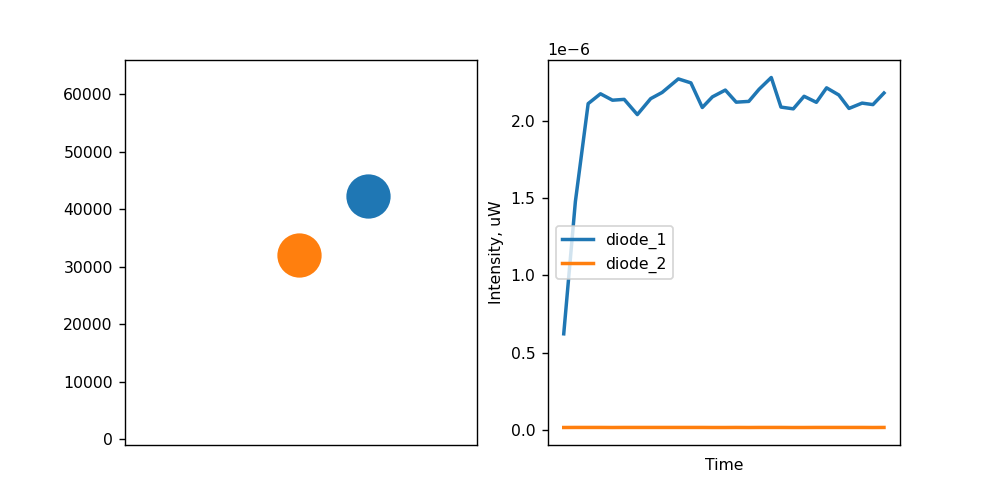

In [422]:
# See position of piezo and intensity real time
import matplotlib.colors as mcolors
import matplotlib.animation as animation

import time
from time import time

freq = [0x0010, 0x0040, 0x0060, 0x0090, 0x0120, 0x0140]
name_freq = ['194.4', '109.375 Hz', '72.91', '48.6 Hz', '19.4', '21.875 Hz'] 
set_scan_circle_params(Device, MNA_t2, source, CircDiaMode=2, 
                       CircDiaSW=6000, AbsPwrAdjustType=2, 
                       AbsPwrMinCircDia = 5000, AbsPwrMaxCircDia = 32000)
set_scan_circle_params(Device, MNA_t, source, CircDiaMode=2, CircDiaSW=6000, 
                       AbsPwrAdjustType=2,
                       AbsPwrMinCircDia = 5000, AbsPwrMaxCircDia = 32000) #5

set_nt_mode(Device, MNA_t, source, 0x03) #3
set_nt_mode(Device, MNA_t2, source, 0x02) #2

move_nanotrack_home(Device, MNA_t2, source)

%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'
plt.rcParams.update({'font.size':9})

sleep_time = 10 # miliseconds, Plot refreshing rate (every sleep_time ms)
diodename = ['1', '2']
MNA = [MNA_t, MNA_t2]

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(8)    #  ширина и
fig.set_figheight(4)    #  высота "Figure"
# intialize two line objects (one in each axes)
x_width = 30

x = []
y = []
for k in range(len(MNA)):
    y.append([])
length_y = len(y)
t0 = time()

x2 = []
y2 = []
for k in range(len(MNA)):
    y2.append([])
length_y2 = len(y2)

# the same axes initalizations as before (just now we do it for both of them)
ax1.set_xlim(-1000, 66000)
ax1.set_ylim(-1000, 66000)


def animate(i, x, y, x2, y2):
    ax1.clear()
    ax1.set_xlim(-1000, 66000)
    ax1.set_ylim(-1000, 66000)
    ax1.set_xticks([])
    for n in range(length_y):
        x,y,_,_,_,_ = curent_circ_pos(Device, MNA[n], source)
        ax1.scatter(x,y, label=diodename[n], s=600)
        
    ax2.clear()
    ax2.set_xticks([])
#     x.append(i * sleep_time * 0.001)
    x2.append(time() - t0)
#     x = x[-50:]
    if (i+1 > x_width):
        x2.pop(0)
    for n in range(length_y2):
        y2[n].append(get_diode_value(Device, MNA[n], source)[0])
        if (i+1 > x_width):
            y2[n].pop(0)
#         y[n] = y[n][-50:]
        Label_Name = "diode_" + str(diodename[n])
        ax2.plot(x2, y2[n], linewidth = 2, color = colors[n][0], label=Label_Name)
    
    ax2.legend(loc = 'center left')
    ax2.set_xlabel('Time')
#     ax.set_ylabel('Intensity Counts')    
    ax2.set_ylabel('Intensity, uW')  

#ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10, repeat=False)
ani = animation.FuncAnimation(fig, animate, fargs=(x, y, x2, y2), interval=sleep_time)
plt.show()

In [52]:
get_current_position(Device, MST_xy, source, 0x01, mst_consts)

Position: -0.0490 mm


-0.049022216796875

In [350]:
move_nanotrack_home(Device, MNA_t, source)

In [351]:
set_nt_mode(Device, MNA_t, source, 0x02) #3
set_nt_mode(Device, MNA_t2, source, 0x02) #2

In [49]:
def get_table_of_diametre(Device, destination, source):
    #MGMSG_PZ_GET_NTCIRCDIALUT
    read = Device.read(40)
    
    Device.write(pack('<HBBBB', 0x0622,
                      0x00, 0x00,
                      destination, source))
                      
    # Get:
    read = Device.read(38)

    if read == b'':
        raise RuntimeError(
            "Cannot read from device, probably invalid destination address")
    print(read)        
    _, _, _, _, _, _, _, LUTVal1, LUTVal2, LUTVal3, LUTVal4, LUTVal5, LUTVal6, LUTVal7, LUTVal8, LUTVal9, LUTVal10, LUTVal11, LUTVal12, LUTVal13, LUTVal14 = unpack('<HBBBBHHHHHHHHHHHHHHHH', read)

    return(LUTVal1, LUTVal2, LUTVal3, LUTVal4, LUTVal5, LUTVal6, LUTVal7, LUTVal8, LUTVal9, LUTVal10, LUTVal11, LUTVal12, LUTVal13, LUTVal14)
	

In [52]:
def set_table_of_diametre(Device, destination, source, list_of_diameters):
    #MGMSG_PZ_SET_NTCIRCDIALUT
    Device.write(pack('<HBBBBHHHHHHHHHHHHHHHH', 0x0621,
                      0x20, 0x00,
                      destination, source, *list_of_diameters))

In [53]:
listt = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
set_table_of_diametre(Device, MNA_t, source, list_of_diameters=listt)

In [12]:
get_table_of_diametre(Device, MNA_t2, source)

(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# Real-time intensity graph

<IPython.core.display.Javascript object>


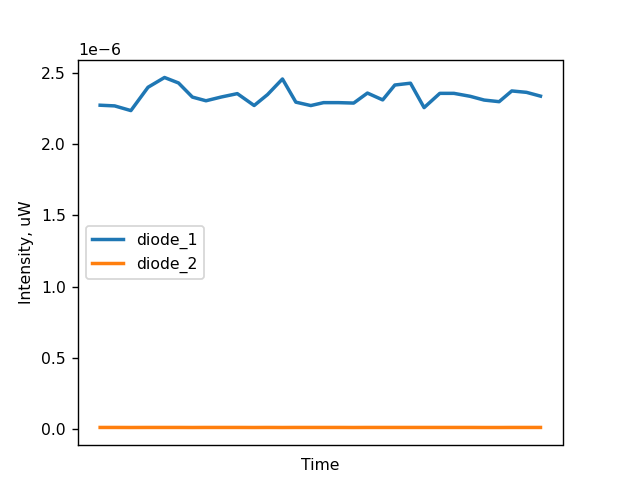

In [471]:
import matplotlib.colors as mcolors
import matplotlib.animation as animation

import time
from time import time

%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'
plt.rcParams.update({'font.size':9})

sleep_time = 1 # miliseconds, Plot refreshing rate (every sleep_time ms)
diodename = diodename = ['1', '2']
MNA = MNA = [MNA_t, MNA_t2]

fig = plt.figure()
fig.set_figwidth(5)    #  ширина и
fig.set_figheight(4)    #  высота "Figure"
ax = fig.add_subplot(1, 1, 1)
colors = list(mcolors.TABLEAU_COLORS.items())
colors.append(('r', 'red'))
colors.append(('b', 'blue'))
colors.append(('g', 'green'))

x_width = 30

x = []
y = []
for k in range(len(MNA)):
    y.append([])
length_y = len(y)
t0 = time()
# This function is called periodically from FuncAnimation
def animate(i, x, y):
    ax.clear()
    ax.set_xticks([])
#     x.append(i * sleep_time * 0.001)
    x.append(time() - t0)
#     x = x[-50:]
    if (i+1 > x_width):
        x.pop(0)
    for n in range(length_y):
        y[n].append(get_diode_value(Device, MNA[n], source)[0])
        if (i+1 > x_width):
            y[n].pop(0)
#         y[n] = y[n][-50:]
        Label_Name = "diode_" + str(diodename[n])
        ax.plot(x, y[n], linewidth = 2, color = colors[n][0], label=Label_Name)
    
    ax.legend(loc = 'center left')
    ax.set_xlabel('Time')
#     ax.set_ylabel('Intensity Counts')    
    ax.set_ylabel('Intensity, uW')  
# Set up plot to call animate() function periodically
ani = animation.FuncAnimation(fig, animate, fargs=(x, y), interval=sleep_time)
plt.show()

In [475]:
x2 = get_current_position(Device, MST_xy, source, 0x02, mst_consts)
move_absolute(Device, MST_xy, source, 0x0002, y_3, mst_consts)
move_nanotrack_home(Device, MNA_t, source)

Position: -0.0050 mm
Moving stage
Absolute diode value = 9.735404482569265e-09
Relative diode value = 0.0008850367748039186 percents
Range = 10
UnderOverRead = 3


In [474]:
x1 = get_current_position(Device, MST_xy, source, 0x01, mst_consts)
move_absolute(Device, MST_xy, source, 0x0001, x_3, mst_consts)
move_nanotrack_home(Device, MNA_t, source)

Position: -0.0260 mm
Moving stage
Absolute diode value = 2.0578631847456563e-06
Relative diode value = 0.1870784630878628 percents
Range = 10
UnderOverRead = 3


In [31]:
# If you want search max of intensity you can move your scan.
#x = get_current_position(Device, MST_xy, source, 0x01, mst_consts)
#move_absolute(Device, MST_xy, source, 0x0001, x-0.05, mst_consts)
#move_relative(Device, MST_xy, source, 0x0001, -0.001, mst_consts)

## Noises
Plot graph of intensity of time without any movement.

In [60]:
set_nt_mode(Device, MNA_t, source, 0x02) #3
set_nt_mode(Device, MNA_t2, source, 0x02) #2


In [59]:
freq = [0x0010, 0x0040, 0x0060, 0x0090, 0x0120, 0x0140]
name_freq = ['194.4', '109.375 Hz', '72.91', '48.6 Hz', '19.4', '21.875 Hz'] 

Absolute diode value = 2.699056835808733e-07
Relative diode value = 0.024536881618701743 percents
Range = 10
UnderOverRead = 3
0
Absolute diode value = 2.699056835808733e-07
Relative diode value = 0.024536881618701743 percents
Range = 10
UnderOverRead = 3
1
Absolute diode value = 2.699056835808733e-07
Relative diode value = 0.024536881618701743 percents
Range = 10
UnderOverRead = 3
2
Absolute diode value = 2.7024140081266523e-07
Relative diode value = 0.02456740012817774 percents
Range = 10
UnderOverRead = 3
3
Absolute diode value = 2.7057711804445717e-07
Relative diode value = 0.02459791863765374 percents
Range = 10
UnderOverRead = 3
4
Absolute diode value = 2.712485240863316e-07
Relative diode value = 0.02465895565660573 percents
Range = 10
UnderOverRead = 3
5
Absolute diode value = 2.712485240863316e-07
Relative diode value = 0.02465895565660573 percents
Range = 10
UnderOverRead = 3
6
Absolute diode value = 2.7057711804445717e-07
Relative diode value = 0.02459791863765374 percents
R

<IPython.core.display.Javascript object>


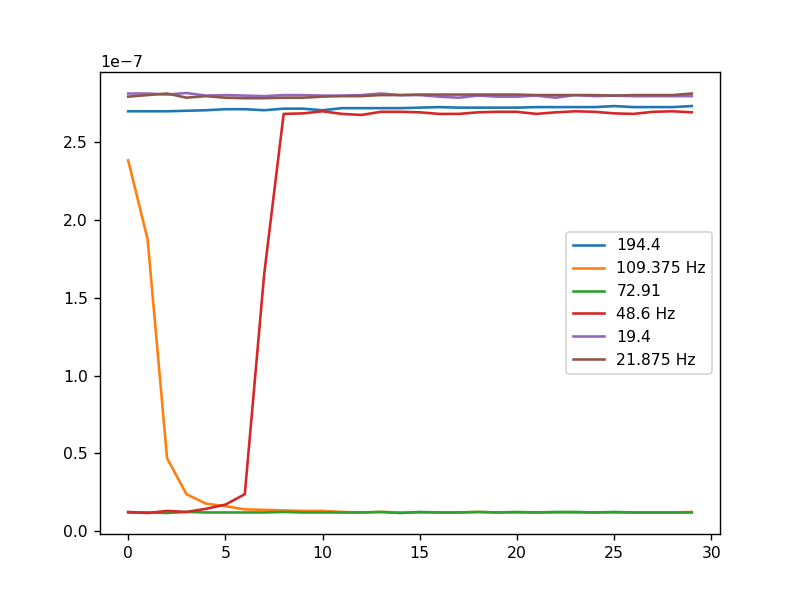

Absolute diode value = 2.3834955698021076e-07
Relative diode value = 0.021668141727958008 percents
Range = 10
UnderOverRead = 3
0
Absolute diode value = 1.8765831555356272e-07
Relative diode value = 0.01705984679708243 percents
Range = 10
UnderOverRead = 3
1
Absolute diode value = 4.699850464362498e-08
Relative diode value = 0.004272591326639607 percents
Range = 10
UnderOverRead = 3
2
Absolute diode value = 2.383495534274971e-08
Relative diode value = 0.0021668141727958007 percents
Range = 10
UnderOverRead = 3
3
Absolute diode value = 1.7792290307738767e-08
Relative diode value = 0.0016174810022278512 percents
Range = 10
UnderOverRead = 3
4
Absolute diode value = 1.6113773426695843e-08
Relative diode value = 0.0014648884548478652 percents
Range = 10
UnderOverRead = 3
5
Absolute diode value = 1.4099551748358863e-08
Relative diode value = 0.001281777397991882 percents
Range = 10
UnderOverRead = 3
6
Absolute diode value = 1.3763847839243226e-08
Relative diode value = 0.0012512588885158849

2
Absolute diode value = 1.24210330909591e-08
Relative diode value = 0.0011291848506118961 percents
Range = 10
UnderOverRead = 3
3
Absolute diode value = 1.443525476929608e-08
Relative diode value = 0.0013122959074678793 percents
Range = 10
UnderOverRead = 3
4
Absolute diode value = 1.7120884265864333e-08
Relative diode value = 0.0015564439832758568 percents
Range = 10
UnderOverRead = 3
5
Absolute diode value = 2.383495534274971e-08
Relative diode value = 0.0021668141727958007 percents
Range = 10
UnderOverRead = 3
6
Absolute diode value = 1.6550187353914225e-07
Relative diode value = 0.015045625171666617 percents
Range = 10
UnderOverRead = 3
7
Absolute diode value = 2.6822718268704193e-07
Relative diode value = 0.024384289071321757 percents
Range = 10
UnderOverRead = 3
8
Absolute diode value = 2.6856287149712443e-07
Relative diode value = 0.024414807580797754 percents
Range = 10
UnderOverRead = 3
9
Absolute diode value = 2.699056835808733e-07
Relative diode value = 0.024536881618701743

6
Absolute diode value = 2.7829830173686787e-07
Relative diode value = 0.02529984435560167 percents
Range = 10
UnderOverRead = 3
7
Absolute diode value = 2.7863399054695037e-07
Relative diode value = 0.02533036286507767 percents
Range = 10
UnderOverRead = 3
8
Absolute diode value = 2.7863399054695037e-07
Relative diode value = 0.02533036286507767 percents
Range = 10
UnderOverRead = 3
9
Absolute diode value = 2.793053965888248e-07
Relative diode value = 0.025391399884029664 percents
Range = 10
UnderOverRead = 3
10
Absolute diode value = 2.7964111382061674e-07
Relative diode value = 0.02542191839350566 percents
Range = 10
UnderOverRead = 3
11
Absolute diode value = 2.7964111382061674e-07
Relative diode value = 0.02542191839350566 percents
Range = 10
UnderOverRead = 3
12
Absolute diode value = 2.8031251986249117e-07
Relative diode value = 0.025482955412457656 percents
Range = 10
UnderOverRead = 3
13
Absolute diode value = 2.8031251986249117e-07
Relative diode value = 0.025482955412457656 

In [62]:
import time
import numpy as np
sec_time = 1
res = []
k=0
set_nt_mode(Device, MNA_t, source, 0x03) #3
set_nt_mode(Device, MNA_t2, source, 0x02) #2
for c in freq:
    set_scan_circle_params(Device, MNA_t2, source, CircDiaMode=1, CircDiaSW=6000, CircOscFreq=c)
    set_scan_circle_params(Device, MNA_t, source, CircDiaMode=1, CircDiaSW=6000, CircOscFreq=c)
    
    res = []
    for i in range(30):
        intensity_2, _, _, _  = get_diode_value(Device, MNA_t, source)
        res.append(intensity_2)
        time.sleep(sec_time)
        print(i)
    plt.plot(range(30), res, label = name_freq[k])
    k+=1
    plt.legend()
plt.show()

Absolute diode value = 1.9370098414128734e-07
Relative diode value = 0.01760917996765038 percents
Range = 10
UnderOverRead = 3
0
Absolute diode value = 1.9571520226691064e-07
Relative diode value = 0.017792291024506364 percents
Range = 10
UnderOverRead = 3
1
Absolute diode value = 1.9135105944201314e-08
Relative diode value = 0.00173955504013184 percents
Range = 10
UnderOverRead = 3
2
Absolute diode value = 1.5106662587527353e-08
Relative diode value = 0.0013733329264198737 percents
Range = 10
UnderOverRead = 3
3
Absolute diode value = 1.342814393012759e-08
Relative diode value = 0.0012207403790398877 percents
Range = 10
UnderOverRead = 3
4
Absolute diode value = 1.24210330909591e-08
Relative diode value = 0.0011291848506118961 percents
Range = 10
UnderOverRead = 3
5
Absolute diode value = 1.3092440909190373e-08
Relative diode value = 0.0011902218695638905 percents
Range = 10
UnderOverRead = 3
6
Absolute diode value = 1.1749626160906246e-08
Relative diode value = 0.0010681478316599017 

62
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
63
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
64
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
65
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
66
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
67
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
68
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
69
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.00

124
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
125
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
126
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
127
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
128
Absolute diode value = 1.0406811412622119e-08
Relative diode value = 0.000946073793755913 percents
Range = 10
UnderOverRead = 3
129
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
130
Absolute diode value = 1.0406811412622119e-08
Relative diode value = 0.000946073793755913 percents
Range = 10
UnderOverRead = 3
131
Absolute diode value = 1.0071108391684902e-08
Relative diode value 

186
Absolute diode value = 1.0406811412622119e-08
Relative diode value = 0.000946073793755913 percents
Range = 10
UnderOverRead = 3
187
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
188
Absolute diode value = 1.0406811412622119e-08
Relative diode value = 0.000946073793755913 percents
Range = 10
UnderOverRead = 3
189
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
190
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
191
Absolute diode value = 1.0406811412622119e-08
Relative diode value = 0.000946073793755913 percents
Range = 10
UnderOverRead = 3
192
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
193
Absolute diode value = 9.735404482569265e-09
Relative diode value = 

248
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
249
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
250
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
251
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
252
Absolute diode value = 1.0406811412622119e-08
Relative diode value = 0.000946073793755913 percents
Range = 10
UnderOverRead = 3
253
Absolute diode value = 1.0406811412622119e-08
Relative diode value = 0.000946073793755913 percents
Range = 10
UnderOverRead = 3
254
Absolute diode value = 1.0406811412622119e-08
Relative diode value = 0.000946073793755913 percents
Range = 10
UnderOverRead = 3
255
Absolute diode value = 1.0071108391684902e-08
Relative diode value =

<IPython.core.display.Javascript object>


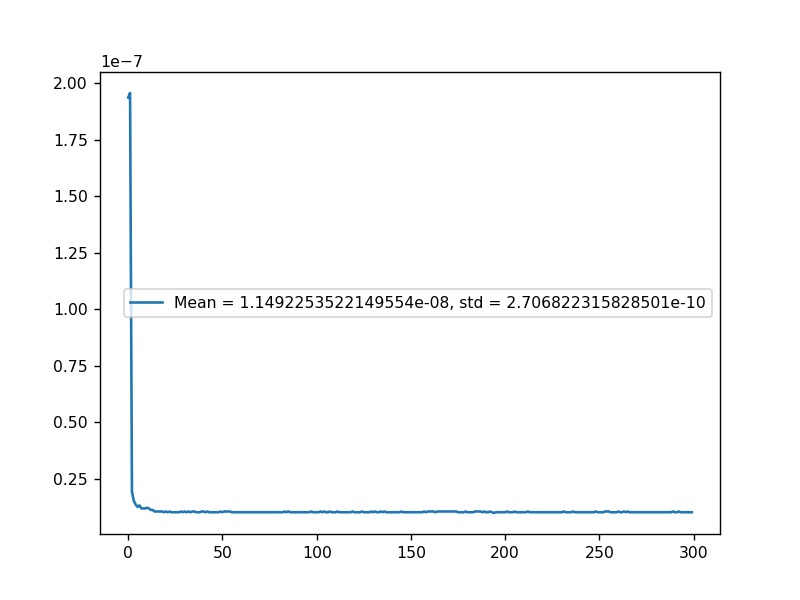

In [70]:
import time
import numpy as np
sec_time = 1
res = []

set_nt_mode(Device, MNA_t, source, 0x03) #3
set_nt_mode(Device, MNA_t2, source, 0x02) #2
set_scan_circle_params(Device, MNA_t2, source, CircDiaMode=1, CircDiaSW=6000, CircOscFreq=0x0060)
set_scan_circle_params(Device, MNA_t, source, CircDiaMode=1, CircDiaSW=6000, CircOscFreq=0x0060)

for i in range(300):
    intensity_2, _, _, _  = get_diode_value(Device, MNA_t, source)
    res.append(intensity_2)
    time.sleep(sec_time)
    print(i)
plt.plot(range(300), res, label = 'Mean = ' + str(np.mean(res[:])) + ', std = ' + str(np.std(res[7:])))
plt.legend()

<IPython.core.display.Javascript object>


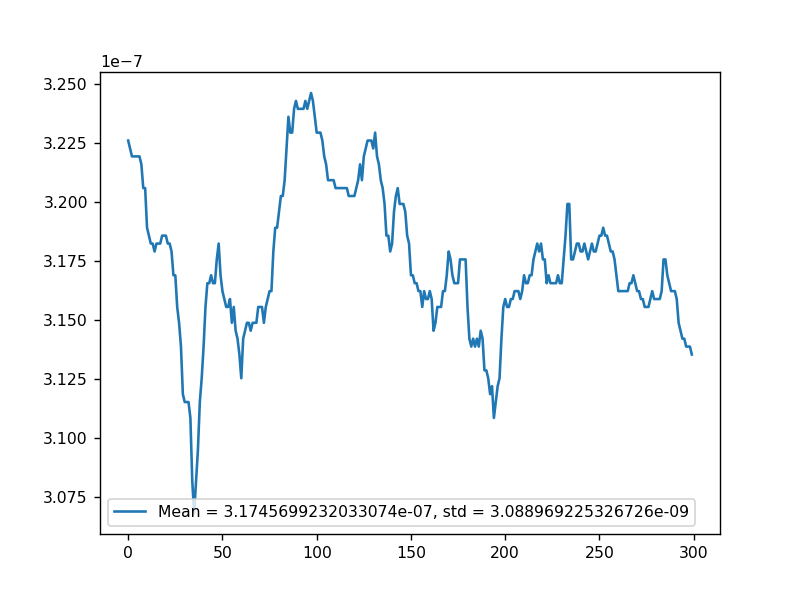

In [47]:
#stability_piezo_xy_off with mode = 2 (latch)
plt.plot(range(300), res, label = 'Mean = ' + str(np.mean(res[:])) + ', std = ' + str(np.std(res[7:])))
plt.legend()
plt.savefig('stability_piezo_xy_off_latch_23_11.png')

<IPython.core.display.Javascript object>


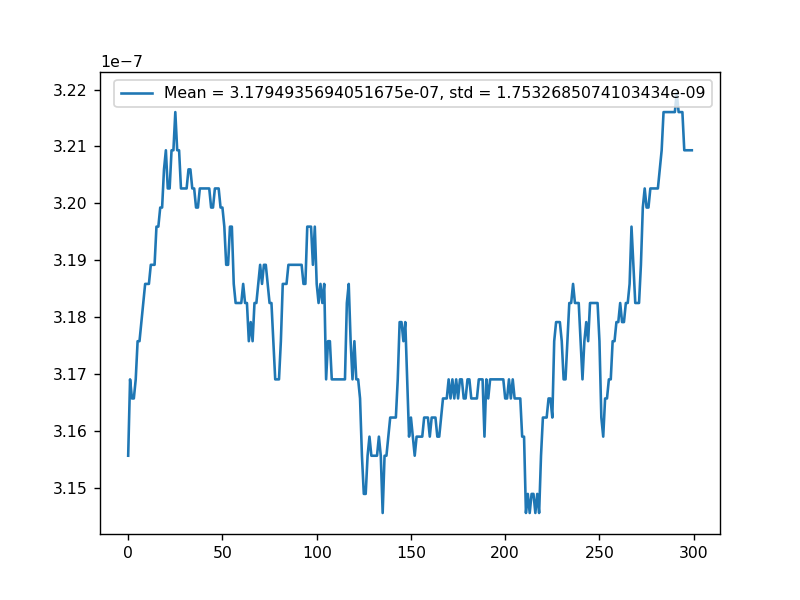

In [64]:
# stability_piezo_xy_on with mode = 3 (tracking + piezo)
plt.plot(range(300), res[:], label = 'Mean = ' + str(np.mean(res[:])) + ', std = ' + str(np.std(res[7:])))
plt.legend()
plt.savefig('stability_piezo_xy_on_21_11_r=6000_freq=0060.png')

## Сканирование вокруг точки
## Не актуально
Проходимся змейкой вокруг заданной точки - ищем максимальную интенсивность.

In [428]:
def search_around(x0, y0, r=0.004, h=0.002, method='square'):
    '''
    Отдает координаты: по которым нужно будет потом пройтись сканером
    '''
    x = [x0]
    y = [y0]
    x_cur = x0
    y_cur = y0
    for i in range(1, round(r/h)*2+1):
        for k in range(1, i+1): # x

            if i % 2 == 0:
                x.append(x_cur - h)
                x_cur -= h
            else:
                x.append(x_cur + h)
                x_cur += h
            y.append(y_cur)
            
        for c in range(1, i+1): # x
            x.append(x_cur)
            if i % 2 == 0:
                y.append(y_cur - h)
                y_cur -= h
            else:
                y.append(y_cur + h)
                y_cur += h
        
    for k in range(1, i+1): # x

            if i+1 % 2 == 0:
                x.append(x_cur - h)
                x_cur -= h
            else:
                x.append(x_cur + h)
                x_cur += h
            y.append(y_cur)
    return x, y

In [429]:
def plot(ar, r_h):
    '''
    Позволяет корректно отрисовать распределение интенсивности в 2д
    '''
    mass = np.zeros(shape =(2*r_h+1, 2*r_h+1))
    x_cur = int(r_h)
    y_cur = int(r_h)
    h = 1
    n = 0
    for i in range(1, round(r_h)*2+1):
        for k in range(1, i+1): # x
            if i % 2 == 0:
                x_cur -= h
            else:
                x_cur += h
            mass[x_cur, y_cur] = ar[n]
            n+=1
            
        for c in range(1, i+1): # x
            if i % 2 == 0:
                y_cur -= h
            else:
                y_cur += h
            mass[x_cur, y_cur] = ar[n]
            n+=1
        
    for k in range(1, i+1): # x
            if i+1 % 2 == 0:
                x_cur -= h
            else:
                x_cur += h
            y.append(y_cur)
            mass[x_cur, y_cur] = ar[n]
            n+=1
    return mass

In [430]:
import time

def max_intensity(x_, y_, sec_time_2=1):
    x, y = search_around(x_, y_)
    result = []
    for i in range(len(x)):
        move_absolute(Device, MST_xy, source, 0x0001, x[i], mst_consts)
        move_absolute(Device, MST_xy, source, 0x0002, y[i], mst_consts)
        time.sleep(sec_time_2)
        intensity_2, _, _, _  = get_diode_value(Device, MNA_t2, source)
        result.append(intensity_2)
    return max(result), result

In [332]:
m, result = max_intensity(x_1, y_1, sec_time_2=2)

Moving stage
Moving stage
Absolute diode value = 1.3763847839243226e-08
Relative diode value = 0.0012512588885158849 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.3763847839243226e-08
Relative diode value = 0.0012512588885158849 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.3763847839243226e-08
Relative diode value = 0.0012512588885158849 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.3763847839243226e-08
Relative diode value = 0.0012512588885158849 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.342814393012759e-08
Relative diode value = 0.0012207403790398877 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.3763847839243226e-08
Relative diode value = 0.0012512588885158849 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.3763847839243226e-08

<IPython.core.display.Javascript object>


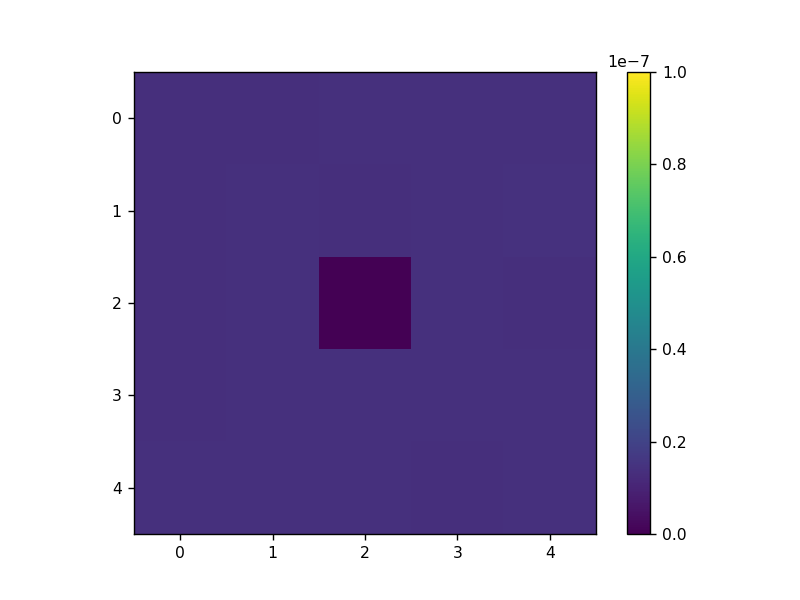

In [333]:
mass = plot(result, 2)
plt.imshow(mass, vmax=1*10**(-7))
plt.colorbar()

### Сканирование
Решетка 300 на 300

In [73]:
import time
sec_time = 5
n_all = 3
answer_map_1 = [] 
set_nt_mode(Device, MNA_t, source, 0x02) #3
set_nt_mode(Device, MNA_t2, source, 0x02) #2
move_nanotrack_home(Device, MNA_t, source)
intensity_1, _, _, _ = get_diode_value(Device, MNA_t, source)
answer_map_1.append(intensity_1)

for i in range(n_all):
    x_1 = get_current_position(Device, MST_xy, source, 0x01, mst_consts)
    print(x_1)
    move_absolute(Device, MST_xy, source, 0x0001, x_1 - 0.27, mst_consts)
    time.sleep(sec_time)
    set_nt_mode(Device, MNA_t, source, 0x03) #3
    move_nanotrack_home(Device, MNA_t, source)
    time.sleep(15)
    intensity_1, _, _, _ = get_diode_value(Device, MNA_t, source)
    answer_map_1.append(intensity_1)

Absolute diode value = 9.866329264696105e-07
Relative diode value = 0.08969389934995575 percents
Range = 10
UnderOverRead = 3
Position: -0.8750 mm
-0.875018310546875
Moving stage
Absolute diode value = 4.2701498159658513e-07
Relative diode value = 0.03881954405346843 percents
Range = 10
UnderOverRead = 3
Position: -1.1550 mm
-1.155018310546875
Moving stage
Absolute diode value = 9.735404482569265e-09
Relative diode value = 0.0008850367748039186 percents
Range = 10
UnderOverRead = 3
Position: -1.4350 mm
-1.435018310546875
Moving stage
Absolute diode value = 9.735404482569265e-09
Relative diode value = 0.0008850367748039186 percents
Range = 10
UnderOverRead = 3


### Сканирование вдоль одной прямой
Ищем растояние между структурами и определяем угол

In [346]:
import time
sec_time = 5
l_step = 0.050
n_all = int(300*4/(l_step*1000))
answer_map_1 = [] 

set_nt_mode(Device, MNA_t, source, 0x03) #3
set_nt_mode(Device, MNA_t2, source, 0x02) #2
x_2_global = get_current_position(Device, MST_xy, source, 0x02, mst_consts)
move_nanotrack_home(Device, MNA_t, source)
x_1 = get_current_position(Device, MST_xy, source, 0x01, mst_consts)
move_absolute(Device, MST_xy, source, 0x0001, x_1 - 0.008, mst_consts)
intensity_1, _, _, _ = get_diode_value(Device, MNA_t, source)
answer_map_1.append(intensity_1)


for c in range(5):
    x_2 = get_current_position(Device, MST_xy, source, 0x02, mst_consts)
    move_absolute(Device, MST_xy, source, 0x0002, x_2 - 0.030, mst_consts)
    move_nanotrack_home(Device, MNA_t, source)
    time.sleep(sec_time)
    intensity_1, _, _, _ = get_diode_value(Device, MNA_t, source)
    answer_map_1.append(intensity_1)
    for i in range(4):
        x_2 = get_current_position(Device, MST_xy, source, 0x02, mst_consts)
        move_absolute(Device, MST_xy, source, 0x0002, x_2 - 0.240, mst_consts)
        move_nanotrack_home(Device, MNA_t, source)
        time.sleep(sec_time)
        intensity_1, _, _, _ = get_diode_value(Device, MNA_t, source)
        answer_map_1.append(intensity_1)
        for k in range(6):
            x_2 = get_current_position(Device, MST_xy, source, 0x02, mst_consts)
            move_absolute(Device, MST_xy, source, 0x0002, x_2 - 0.010, mst_consts)
            move_nanotrack_home(Device, MNA_t, source)
            time.sleep(sec_time)
            intensity_1, _, _, _ = get_diode_value(Device, MNA_t, source)
            answer_map_1.append(intensity_1)
        
        
    move_absolute(Device, MST_xy, source, 0x0002, x_2_global, mst_consts)
    x_1 = get_current_position(Device, MST_xy, source, 0x01, mst_consts)
    move_absolute(Device, MST_xy, source, 0x0001, x_1 + 0.004, mst_consts)
    time.sleep(5)

Position: 0.0100 mm
Position: -0.0320 mm
Moving stage
Absolute diode value = 5.26047529092466e-07
Relative diode value = 0.0478225043488876 percents
Range = 10
UnderOverRead = 3
Position: 0.0100 mm
Moving stage
Absolute diode value = 9.735404482569265e-09
Relative diode value = 0.0008850367748039186 percents
Range = 10
UnderOverRead = 3
Position: -0.0300 mm
Moving stage
Absolute diode value = 9.735404482569265e-09
Relative diode value = 0.0008850367748039186 percents
Range = 10
UnderOverRead = 3
Position: -0.2800 mm
Moving stage
Absolute diode value = 9.735404482569265e-09
Relative diode value = 0.0008850367748039186 percents
Range = 10
UnderOverRead = 3
Position: -0.3000 mm
Moving stage
Absolute diode value = 9.735404482569265e-09
Relative diode value = 0.0008850367748039186 percents
Range = 10
UnderOverRead = 3
Position: -0.3200 mm
Moving stage
Absolute diode value = 9.735404482569265e-09
Relative diode value = 0.0008850367748039186 percents
Range = 10
UnderOverRead = 3
Position: -0.

Absolute diode value = 9.735404482569265e-09
Relative diode value = 0.0008850367748039186 percents
Range = 10
UnderOverRead = 3
Position: -1.1200 mm
Moving stage
Absolute diode value = 9.735404482569265e-09
Relative diode value = 0.0008850367748039186 percents
Range = 10
UnderOverRead = 3
Position: -1.1400 mm
Moving stage
Absolute diode value = 9.735404482569265e-09
Relative diode value = 0.0008850367748039186 percents
Range = 10
UnderOverRead = 3
Position: -1.3900 mm
Moving stage
Absolute diode value = 9.735404482569265e-09
Relative diode value = 0.0008850367748039186 percents
Range = 10
UnderOverRead = 3
Position: -1.4100 mm
Moving stage
Absolute diode value = 9.735404482569265e-09
Relative diode value = 0.0008850367748039186 percents
Range = 10
UnderOverRead = 3
Position: -1.4300 mm
Moving stage
Absolute diode value = 9.735404482569265e-09
Relative diode value = 0.0008850367748039186 percents
Range = 10
UnderOverRead = 3
Position: -1.4500 mm
Moving stage
Absolute diode value = 9.735

Absolute diode value = 9.735404482569265e-09
Relative diode value = 0.0008850367748039186 percents
Range = 10
UnderOverRead = 3
Position: -0.7300 mm
Moving stage
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
Position: -0.7500 mm
Moving stage
Absolute diode value = 9.735404482569265e-09
Relative diode value = 0.0008850367748039186 percents
Range = 10
UnderOverRead = 3
Position: -0.7700 mm
Moving stage
Absolute diode value = 9.735404482569265e-09
Relative diode value = 0.0008850367748039186 percents
Range = 10
UnderOverRead = 3
Position: -1.0200 mm
Moving stage
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
Position: -1.0400 mm
Moving stage
Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
Position: -1.0600 mm
Moving stage
Absolute diode value = 9.

In [344]:
move_absolute(Device, MST_xy, source, 0x0002, x_2_global, mst_consts)
time.sleep(5)

Moving stage


In [345]:
move_absolute(Device, MST_xy, source, 0x0001, x_1, mst_consts)
time.sleep(5)

Moving stage


<IPython.core.display.Javascript object>


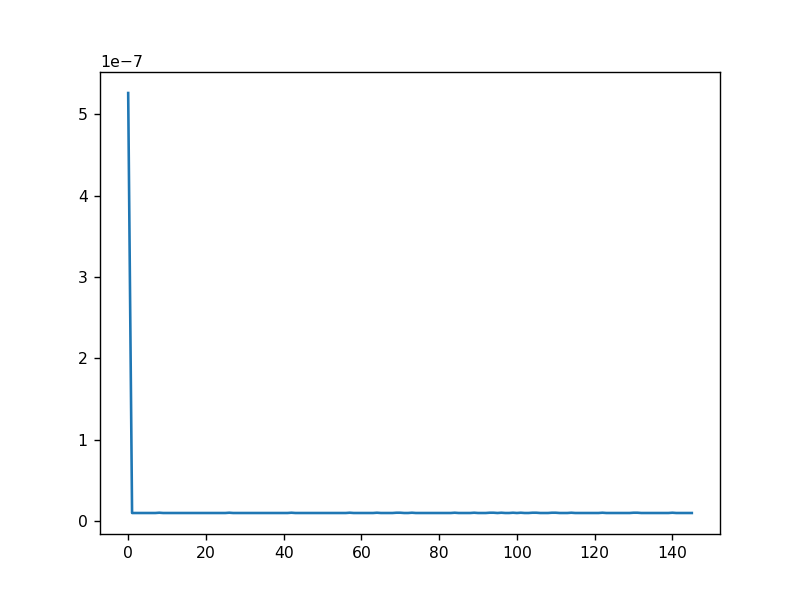

In [347]:
plt.plot(answer_map_1)

<IPython.core.display.Javascript object>


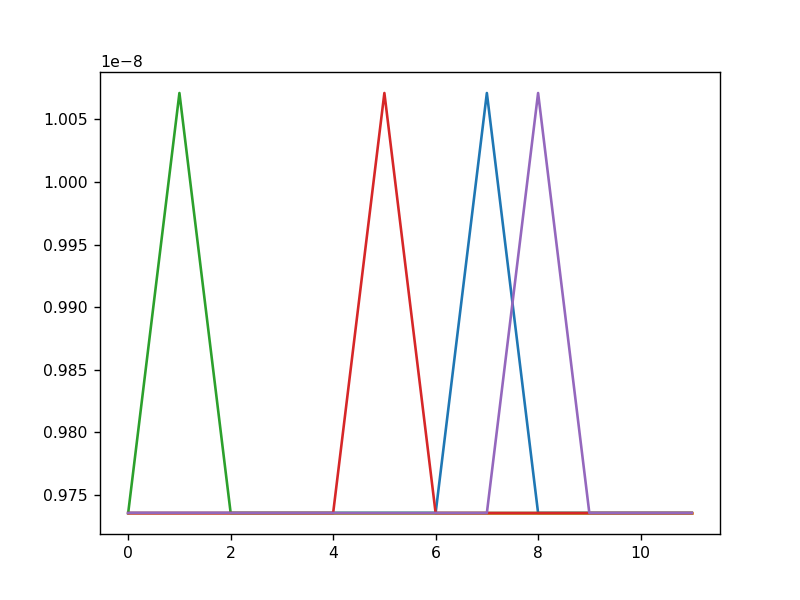

In [349]:
for i in range(5):
    plt.plot(answer_map_1[1+i*12: 1+(i+1)*12])

### Скнирование по трем точкам

In [371]:
# Верхний левый угол
x_1 = get_current_position(Device, MST_xy, source, 0x01, mst_consts)
y_1 = get_current_position(Device, MST_xy, source, 0x02, mst_consts)

Position: -0.0260 mm
Position: 0.0050 mm


In [470]:
# Верхний правый угол
x_2 = get_current_position(Device, MST_xy, source, 0x01, mst_consts)
y_2 = get_current_position(Device, MST_xy, source, 0x02, mst_consts)

Position: -0.6380 mm
Position: 0.0220 mm


In [476]:
# Нижний правый угол
x_3 = get_current_position(Device, MST_xy, source, 0x01, mst_consts)
y_3 = get_current_position(Device, MST_xy, source, 0x02, mst_consts)

Position: -0.0080 mm
Position: -0.6450 mm


In [485]:
import time
sec_time = 5

def tree_point_scan(x_1, y_1, x_2, y_2, x_3, y_3, n_x, n_y):
    n_x = 2*(n_x-1)
    n_y = 2*(n_y-1)
    x_4, y_4 = x_1 + x_3 - x_2, y_1 + y_3 - y_2
    #x_4, y_4 = - x_1 + x_3 + x_2, - y_1 + y_3 + y_2
    # один шаг по х
    step_x_x = (x_2-x_1)/n_x
    step_x_y = (y_2-y_1)/n_x
    # один шаг по у
    step_y_x = (x_4-x_1)/n_x
    step_y_y = (y_4-y_1)/n_x
    print(step_y_x)
    print(step_y_y)
    answer_map_1 = [ [] for _ in range(n_y+1) ] 
    answer_map_2 = [ [] for _ in range(n_y+1) ] 

    move_absolute(Device, MST_xy, source, 0x0001, x_1, mst_consts)
    move_absolute(Device, MST_xy, source, 0x0002, y_1, mst_consts)
    time.sleep(sec_time)
    print(get_diode_value(Device, MNA_t, source))
    
    for i in range(n_y+1):
        for j in range(n_x+1):
            move_absolute(Device, MST_xy, source, 0x0001, x_1 + step_x_x*(j)+ step_y_x*(i), mst_consts)
            move_absolute(Device, MST_xy, source, 0x0002, y_1 + step_x_y*(j)+ step_y_y*(i), mst_consts)
            move_nanotrack_home(Device, MNA_t, source)
            x_curr = x_1 + step_x_x*(j)+ step_y_x*(i)
            y_curr = y_1 + step_x_y*(j)+ step_y_y*(i)
            time.sleep(sec_time)
            
            intensity_1, _, _, _ = get_diode_value(Device, MNA_t, source)
            answer_map_1[i].append(intensity_1)
            #intensity_2, _, _, _  = get_diode_value(Device, MNA_t2, source)
            #answer_map_2[i].append(intensity_2)
            answer_map_2[i].append(max_intensity(x_curr, y_curr)[0])
        #move_absolute(Device, MST_xy, source, 0x0001, x_1 + step_y_x*(i), mst_consts)
        #move_absolute(Device, MST_xy, source, 0x0002, y_1 + step_y_y*(i), mst_consts)
    return answer_map_1, answer_map_2

In [486]:
a1, a2 = tree_point_scan(x_1, y_1, x_2, y_2, x_3, y_3, 3, 3)

0.15749908447265626
-0.16674896240234374
Moving stage
Moving stage
Absolute diode value = 6.218238013389055e-06
Relative diode value = 0.565294351023896 percents
Range = 10
UnderOverRead = 3
[6.218238013389055e-06, 18523, 10, 3]
Moving stage
Moving stage
Absolute diode value = 5.726767994929105e-06
Relative diode value = 0.5206152531510361 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.3763847839243226e-08
Relative diode value = 0.0012512588885158849 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.3763847839243226e-08
Relative diode value = 0.0012512588885158849 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.3763847839243226e-08
Relative diode value = 0.0012512588885158849 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.3763847839243226e-08
Relative diode value = 0.0012512588885158849 percents
Range = 10
UnderOverRead = 3


Absolute diode value = 1.0071108391684902e-08
Relative diode value = 0.0009155552842799158 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.3763847839243226e-08
Relative diode value = 0.0012512588885158849 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.3763847839243226e-08
Relative diode value = 0.0012512588885158849 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.342814393012759e-08
Relative diode value = 0.0012207403790398877 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.3763847839243226e-08
Relative diode value = 0.0012512588885158849 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.3763847839243226e-08
Relative diode value = 0.0012512588885158849 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.3763847839243226e-08
Relative diode value = 0.

Absolute diode value = 1.3763847839243226e-08
Relative diode value = 0.0012512588885158849 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.342814393012759e-08
Relative diode value = 0.0012207403790398877 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.342814393012759e-08
Relative diode value = 0.0012207403790398877 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.3763847839243226e-08
Relative diode value = 0.0012512588885158849 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.3763847839243226e-08
Relative diode value = 0.0012512588885158849 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.342814393012759e-08
Relative diode value = 0.0012207403790398877 percents
Range = 10
UnderOverRead = 3
Moving stage
Moving stage
Absolute diode value = 1.342814393012759e-08
Relative diode value = 0.001

KeyboardInterrupt: 

In [480]:
%matplotlib inline  

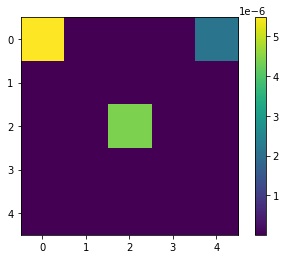

In [482]:
plt.imshow(a1)
plt.colorbar()
plt.show()

# Sweep

In [137]:
import base64
import sys
import time
import numpy as np

from toptica.lasersdk.dlcpro.v2_0_3 import DLCpro, NetworkConnection, DeviceNotFoundError, DecopError, UserLevel

DLCPRO_CONNECTION = '172.16.5.136'

def change_wavelength(dlc, nm=925, sleep=1):
    #print('Firmware Version :', dlc.fw_ver.get())
    #print('   System Health :', dlc.system_health_txt.get())
    print('        Emission :', dlc.emission.get())
    #print('  Scan Frequency :', dlc.laser1.scan.frequency.get())

    print(dlc.laser1.ctl.wavelength_act.get())
    dlc.laser1.ctl.wavelength_set.set(float(nm))
    time.sleep(sleep)
    print(dlc.laser1.ctl.wavelength_act.get())

def sweep(start_nm, finish_nm, step_nm, sleep=1, optimisation=False):
    result = []
    wavelength = np.arange(start_nm, finish_nm, step_nm)
    with DLCpro(NetworkConnection(DLCPRO_CONNECTION)) as dlc:
        change_wavelength(dlc, start_nm, sleep=10)
        if optimisation==False:
            for nm in np.arange(start_nm, finish_nm, step_nm):
                change_wavelength(dlc, nm, sleep=sleep)
                total = []
                for itr in range(10):
                    intensity_2, _, _, _  = get_diode_value(Device, MNA_t, source)
                    total.append(intensity_2)
                    time.sleep(0.2)
                intensity_2 = np.max(intensity_2)
                result.append(intensity_2)
        else:
            for nm in np.arange(start_nm, finish_nm, step_nm):
                change_wavelength(dlc, nm, sleep=sleep)
                intensity_2 = max_intensity(x1, y1)
                result.append(intensity_2)
    return [wavelength, result]

In [140]:
wavelength, intensity = sweep(910, 960, 0.2, sleep=1.5, optimisation=False)

        Emission : True
959.0001296401101
909.9996155500182
        Emission : True
909.9996155500182
909.9996155500182
Absolute diode value = 1.3159581158106448e-07
Relative diode value = 0.0119632557145909 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.3092440553919005e-07
Relative diode value = 0.011902218695638905 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.2857448439262953e-07
Relative diode value = 0.011688589129306926 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.282387813716923e-07
Relative diode value = 0.011658070619830927 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.2857448439262953e-07
Relative diode value = 0.011688589129306926 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.2891018741356675e-07
Relative diode value = 0.011719107638782922 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.2723167230888066e-07
Relative diode value = 0.011566515091402937 percents
Range = 10
Under

Absolute diode value = 6.848353706345733e-08
Relative diode value = 0.006225775933103427 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 6.814783404252012e-08
Relative diode value = 0.00619525742362743 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 6.814783404252012e-08
Relative diode value = 0.00619525742362743 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 6.78121310215829e-08
Relative diode value = 0.006164738914151433 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 6.848353706345733e-08
Relative diode value = 0.006225775933103427 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 6.98263491472062e-08
Relative diode value = 0.006347849971007416 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 6.98263491472062e-08
Relative diode value = 0.006347849971007416 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.049775518908064e-08
Relative diode value = 0.00640888698995941 percents
Range = 10
UnderOve

Absolute diode value = 2.3633533885458746e-07
Relative diode value = 0.021485030671102023 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.3599963583365025e-07
Relative diode value = 0.021454512161626027 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.3432112072896416e-07
Relative diode value = 0.021301919614246042 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.312997793296745e-07
Relative diode value = 0.021027253028962065 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.3197118537154893e-07
Relative diode value = 0.02108829004791406 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.349925267708386e-07
Relative diode value = 0.021362956633198035 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.3096407630873728e-07
Relative diode value = 0.02099673451948607 percents
Range = 10
UnderOverRead = 3
        Emission : True
912.3998708963318
912.5994058012608
Absolute diode value = 1.9772942039253394e-07
Re

Absolute diode value = 1.2958159345544118e-07
Relative diode value = 0.011780144657734916 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.3058870251825283e-07
Relative diode value = 0.011871700186162909 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.3159581158106448e-07
Relative diode value = 0.0119632557145909 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.3159581158106448e-07
Relative diode value = 0.0119632557145909 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.3260292064387613e-07
Relative diode value = 0.012054811243018892 percents
Range = 10
UnderOverRead = 3
        Emission : True
913.6000629425087
913.8004275441424
Absolute diode value = 1.4871669407057198e-07
Relative diode value = 0.013519699697866757 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.5039520917525806e-07
Relative diode value = 0.013672292245246742 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.4972380313338363e-07
Re

Absolute diode value = 5.327616463546292e-07
Relative diode value = 0.04843287453840754 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.314187774274615e-07
Relative diode value = 0.048310800500503556 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.324259291228373e-07
Relative diode value = 0.048402356028931545 percents
Range = 10
UnderOverRead = 3
        Emission : True
914.7999331235845
915.0000545382533
Absolute diode value = 4.877773562839138e-07
Relative diode value = 0.04434339426862392 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 4.874416390521219e-07
Relative diode value = 0.04431287575914793 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 4.813989562535426e-07
Relative diode value = 0.04376354258857997 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 4.743491786030063e-07
Relative diode value = 0.043122653889584035 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 4.790490493178368e-07
Relative d

Absolute diode value = 2.578203748271335e-07
Relative diode value = 0.023438215277565844 percents
Range = 10
UnderOverRead = 3
        Emission : True
915.9998676776808
916.1999247193291
Absolute diode value = 2.752769603375782e-07
Relative diode value = 0.025025177770317698 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.7426983706391184e-07
Relative diode value = 0.024933622241889705 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.7594836637945264e-07
Relative diode value = 0.025086214789269694 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.77626867273284e-07
Relative diode value = 0.02523880733664968 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.7594836637945264e-07
Relative diode value = 0.025086214789269694 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.7594836637945264e-07
Relative diode value = 0.025086214789269694 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.7829830173686787e-07
Rel

Absolute diode value = 8.332163474733534e-07
Relative diode value = 0.07574694051942503 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 8.285164767585229e-07
Relative diode value = 0.07531968138676107 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 8.231452284235274e-07
Relative diode value = 0.07483138523514511 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 8.261665698228171e-07
Relative diode value = 0.07510605182042909 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 8.204596042560297e-07
Relative diode value = 0.07458723715933714 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 8.231452284235274e-07
Relative diode value = 0.07483138523514511 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 8.345591595571022e-07
Relative diode value = 0.07586901455732901 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 8.26502287054609e-07
Relative diode value = 0.07513657032990509 percents
Range = 10
UnderOverRe

Absolute diode value = 4.894558287560358e-07
Relative diode value = 0.044495986816003905 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 4.844202976528322e-07
Relative diode value = 0.044038209173863946 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 4.840845804210403e-07
Relative diode value = 0.04400769066438795 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 4.803918614015856e-07
Relative diode value = 0.04367198706015198 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 4.793847665496287e-07
Relative diode value = 0.043580431531723994 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 4.803918614015856e-07
Relative diode value = 0.04367198706015198 percents
Range = 10
UnderOverRead = 3
        Emission : True
918.5993360638223
918.8000511407882
Absolute diode value = 5.233619049249683e-07
Relative diode value = 0.047578356273079624 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.267189635560499e-07
Relative 

Absolute diode value = 1.3085726777717355e-06
Relative diode value = 0.11896114993743706 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.3209936469138484e-06
Relative diode value = 0.12009033478804895 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.3126010571795632e-06
Relative diode value = 0.11932737205114902 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.3199866089053103e-06
Relative diode value = 0.11999877925962096 percents
Range = 10
UnderOverRead = 3
        Emission : True
919.799857127658
920.0000429153467
Absolute diode value = 1.3005158052692423e-06
Relative diode value = 0.11822870571001312 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.311929736402817e-06
Relative diode value = 0.11926633503219702 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.3025299949731561e-06
Relative diode value = 0.11841181676686911 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.3011871260459884e-06
Relativ

Absolute diode value = 1.0547806823524297e-06
Relative diode value = 0.09588915677358317 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.0447096201460226e-06
Relative diode value = 0.09497360148930327 percents
Range = 10
UnderOverRead = 3
        Emission : True
920.9993911385174
921.2002135038504
Absolute diode value = 1.1296426691842498e-06
Relative diode value = 0.10269478438673055 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1145359621878015e-06
Relative diode value = 0.10132145146031069 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1145359621878015e-06
Relative diode value = 0.10132145146031069 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1084932793892222e-06
Relative diode value = 0.10077211828974272 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1034577482860186e-06
Relative diode value = 0.10031434064760276 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1081575621574302e-06
Relat

        Emission : True
922.1994902014428
922.3992825984527
Absolute diode value = 2.060213091681362e-06
Relative diode value = 0.18729209265419478 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.152867182303453e-06
Relative diode value = 0.19571520126956998 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.1370890408434207e-06
Relative diode value = 0.19428083132419813 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.1028474748163717e-06
Relative diode value = 0.19116794335764642 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.089083636747091e-06
Relative diode value = 0.18991668446913051 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.1575669961748645e-06
Relative diode value = 0.19614246040223396 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.1474959339684574e-06
Relative diode value = 0.19522690511795404 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.1364178337535122e-06
Relative

Absolute diode value = 1.752372781993472e-06
Relative diode value = 0.15930661946470534 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.7453230611863546e-06
Relative diode value = 0.1586657307657094 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.7476729681220604e-06
Relative diode value = 0.1588793603320414 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.7496871578259743e-06
Relative diode value = 0.15906247138889737 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.7456587784181465e-06
Relative diode value = 0.1586962492751854 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.7339091300527798e-06
Relative diode value = 0.1576281014435255 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.7483444025856443e-06
Relative diode value = 0.15894039735099338 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.7567369923199294e-06
Relative diode value = 0.15970336008789332 percents
Range = 10
UnderOv

Absolute diode value = 3.047181508009089e-06
Relative diode value = 0.2770165105136265 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.0327464628499e-06
Relative diode value = 0.2757042146061586 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.0418102596740937e-06
Relative diode value = 0.2765282143620106 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.0606097425334156e-06
Relative diode value = 0.2782372508926664 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.026367949132691e-06
Relative diode value = 0.2751243629261147 percents
Range = 10
UnderOverRead = 3
        Emission : True
924.7993376731478
924.9998524784954
Absolute diode value = 3.289223968749866e-06
Relative diode value = 0.2990203558458205 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.240546902816277e-06
Relative diode value = 0.2945951719718009 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.263038934164797e-06
Relative diode value

Absolute diode value = 3.202612333552679e-06
Relative diode value = 0.2911465804010132 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.1301003673434025e-06
Relative diode value = 0.28455458235419784 percents
Range = 10
UnderOverRead = 3
        Emission : True
925.9999231100037
926.1993006586612
Absolute diode value = 3.1697134090791224e-06
Relative diode value = 0.2881557664723655 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.2187260785576655e-06
Relative diode value = 0.2926114688558611 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.1381573535327334e-06
Relative diode value = 0.28528702658162175 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.124057684544823e-06
Relative diode value = 0.28400524918362985 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.1576280434819637e-06
Relative diode value = 0.2870571001312296 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.189184326402028e-06
Relative dio

927.3991636871793
Absolute diode value = 3.797479166678386e-06
Relative diode value = 0.34522537919248025 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.8021789805497974e-06
Relative diode value = 0.3456526383251442 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.785058197536273e-06
Relative diode value = 0.34409619434186833 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.771965793930576e-06
Relative diode value = 0.3429059724723045 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.7988220356055535e-06
Relative diode value = 0.34534745323038424 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.8005005080776755e-06
Relative diode value = 0.3455000457777642 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.7830438941455213e-06
Relative diode value = 0.34391308328501236 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.794122221734142e-06
Relative diode value = 0.3449201940977203 percents
Ran

Absolute diode value = 5.123843948240392e-06
Relative diode value = 0.4658040101321451 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.167821200302569e-06
Relative diode value = 0.4698019348735008 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.1577503654698376e-06
Relative diode value = 0.46888637958922086 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.1376077863096725e-06
Relative diode value = 0.467055269020661 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.0617391025298275e-06
Relative diode value = 0.4601580858790857 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.151371624378953e-06
Relative diode value = 0.46830652790917693 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.244697604211979e-06
Relative diode value = 0.47679067354350413 percents
Range = 10
UnderOverRead = 3
        Emission : True
928.5998850226333
928.7995558261607
Absolute diode value = 5.384014457376907e-06
Relative diode 

Absolute diode value = 5.23261223861482e-06
Relative diode value = 0.47569200720236826 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.2443615459196735e-06
Relative diode value = 0.47676015503402813 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.213476924836868e-06
Relative diode value = 0.4739524521622364 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.209448318055365e-06
Relative diode value = 0.4735862300485244 percents
Range = 10
UnderOverRead = 3
        Emission : True
929.7999340176543
929.9991828202715
Absolute diode value = 5.083224095869809e-06
Relative diode value = 0.4621112704855495 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.0959806685568765e-06
Relative diode value = 0.46327097384563737 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.122837137605529e-06
Relative diode value = 0.46571245460371713 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.120822606841102e-06
Relative diode 

Absolute diode value = 6.817468602093868e-06
Relative diode value = 0.619769890438551 percents
Range = 10
UnderOverRead = 3
        Emission : True
930.9991747736439
931.2000185966502
Absolute diode value = 7.329081199713983e-06
Relative diode value = 0.6662800988799708 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.337473562074592e-06
Relative diode value = 0.6670430616168707 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.386150628008181e-06
Relative diode value = 0.6714682454908902 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.29920338926604e-06
Relative diode value = 0.663563951536607 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.252204795804573e-06
Relative diode value = 0.6592913602099674 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.236762485263171e-06
Relative diode value = 0.6578875087740714 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.321695647988236e-06
Relative diode value = 

Absolute diode value = 7.280404133780394e-06
Relative diode value = 0.6618549150059511 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.188421477621887e-06
Relative diode value = 0.6534928434095278 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.2528764576418325e-06
Relative diode value = 0.6593523972289194 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.306588940991787e-06
Relative diode value = 0.6642353587450789 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.365336841758108e-06
Relative diode value = 0.6695760979033784 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.278725661308272e-06
Relative diode value = 0.6617023224585711 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.166264822444646e-06
Relative diode value = 0.6514786217841121 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.1296731221082155e-06
Relative diode value = 0.6481521042512284 percents
Range = 10
UnderOverRead = 

Absolute diode value = 8.418103789153975e-06
Relative diode value = 0.7652821436201056 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 8.481215445499402e-06
Relative diode value = 0.771019623401593 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 8.462416190013755e-06
Relative diode value = 0.7693105868709372 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 8.416089258389547e-06
Relative diode value = 0.7650990325632496 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 8.430189154751133e-06
Relative diode value = 0.7663808099612415 percents
Range = 10
UnderOverRead = 3
        Emission : True
933.6000665187876
933.7998946785864
Absolute diode value = 9.018005584948696e-06
Relative diode value = 0.8198187200537126 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 8.984435226011556e-06
Relative diode value = 0.8167668691061128 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 8.94817912922008e-06
Relative diode value =

Absolute diode value = 1.0118442332895938e-05
Relative diode value = 0.9198583941160313 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.005902322503971e-05
Relative diode value = 0.9144566179387799 percents
Range = 10
UnderOverRead = 3
        Emission : True
934.7996649026671
934.9998077750091
Absolute diode value = 1.0077822480525356e-05
Relative diode value = 0.9161656544694358 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.0070436474052258e-05
Relative diode value = 0.9154942472609637 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.000497468339745e-05
Relative diode value = 0.9095431379131443 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 9.954954293789342e-06
Relative diode value = 0.9049958800012208 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.000967404252151e-05
Relative diode value = 0.9099703970458083 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.004995920084184e-05
Relative diode va

Absolute diode value = 9.894191862258594e-06
Relative diode value = 0.8994720297860652 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 9.827723260968924e-06
Relative diode value = 0.8934293649098178 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 9.85424321697792e-06
Relative diode value = 0.8958403271584215 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 9.825708730204497e-06
Relative diode value = 0.8932462538529619 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 9.876400326902512e-06
Relative diode value = 0.8978545487838374 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 9.904934813675936e-06
Relative diode value = 0.9004486220892972 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 9.806238267628942e-06
Relative diode value = 0.891476180303354 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 9.964353921532165e-06
Relative diode value = 0.9058503982665487 percents
Range = 10
UnderOverRead = 3
Ab

Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
        Emission : True
937.3994336962362
937.5997553825233
Absolute diode value = 1.0950987416435964e-05
Relative diode value = 0.9955442976165044 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.0793542060127947e-05
Relative diode value = 0.9812311166722617 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.0988585927407257e-05
Relative diode value = 0.9989623706778161 percents
Range = 10
UnderOverRead = 3
Absolut

Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
        Emission : True
938.799775767313
938.9994179606091
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relativ

Absolute diode value = 1.0409832611912861e-05
Relative diode value = 0.9463484603411969 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.0350749107601587e-05
Relative diode value = 0.9409772026734214 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.0060365639219526e-05
Relative diode value = 0.9145786919766838 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.0088564522447996e-05
Relative diode value = 0.9171422467726676 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.0270851817040239e-05
Relative diode value = 0.9337137974181341 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.0272866347804666e-05
Relative diode value = 0.9338969084749901 percents
Range = 10
UnderOverRead = 3
        Emission : True
940.1998317360777
940.3997457265702
Absolute diode value = 1.0497115908947308e-05
Relative diode value = 0.9542832728049562 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.050718674378004e-05
Relative diod

Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.094528033718234e-05
Relative diode value = 0.9950254829554125 percents
Range = 10
UnderOverRead = 3
        Emission : True
941.4000523924859
941.5991867541782
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914

Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
        Emission : True
942.7997578859184
942.9997147917577
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relati

Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
        Emission : True
944.1994347691199
944.3995561837885
Absolute diode value = 1.0915066923189443e-05
Relative diode value = 0.9922788171025727 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.091406011255458e-05
Relative diode value = 0.9921872615741447 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.1000000085914508e-05
Relative diode value = 1.0 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.0747550732048694e-05
Relative diode value = 0.9770500808740501 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.0803949408000335e-05
Relative diode value = 0.9821771904660176 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.0711294635257218e-05
Relative diode value = 0.9737540818506424 percents
Range =

Absolute diode value = 1.017416889226297e-05
Relative diode value = 0.9249244666890469 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.017114755086368e-05
Relative diode value = 0.924649800103763 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.042493931890931e-05
Relative diode value = 0.9477217932676169 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.0245674275211059e-05
Relative diode value = 0.9314249092074343 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.030307885230286e-05
Relative diode value = 0.9366435743278299 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.0096286132466048e-05
Relative diode value = 0.9178441724906156 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.0244666555081494e-05
Relative diode value = 0.9313333536790063 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.0248023500025738e-05
Relative diode value = 0.9316385387737662 percents
Range = 10
UnderOverRead =

Absolute diode value = 1.0445081898069475e-05
Relative diode value = 0.9495529038361766 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.0466231287864503e-05
Relative diode value = 0.9514755699331645 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.0333964382880367e-05
Relative diode value = 0.9394512771996215 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.043333213601727e-05
Relative diode value = 0.9484847560045168 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.015436282614246e-05
Relative diode value = 0.923123874629963 percents
Range = 10
UnderOverRead = 3
        Emission : True
946.7993394612872
946.9997040629211
Absolute diode value = 1.0265815944876522e-05
Relative diode value = 0.9332560197759942 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 9.918362593452912e-06
Relative diode value = 0.9016693624683371 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.0096286132466048e-05
Relative diode v

Absolute diode value = 7.867884960433003e-06
Relative diode value = 0.7152623065889462 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.6271858233667444e-06
Relative diode value = 0.6933805352946563 percents
Range = 10
UnderOverRead = 3
        Emission : True
948.0002896785909
948.1994168877254
Absolute diode value = 7.883663784014061e-06
Relative diode value = 0.716696676534318 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.93469007476233e-06
Relative diode value = 0.7213354899746697 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.8067869253573e-06
Relative diode value = 0.7097079378643147 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.900112905190326e-06
Relative diode value = 0.7181920834986419 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.784966328472365e-06
Relative diode value = 0.7077242347483749 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.969939360918943e-06
Relative diode value = 

Absolute diode value = 7.224341516121058e-06
Relative diode value = 0.6567583239234596 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.317667041206732e-06
Relative diode value = 0.6652424695577868 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.038361673039617e-06
Relative diode value = 0.6398510696737572 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.0393689384218305e-06
Relative diode value = 0.6399426252021851 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.068910690577468e-06
Relative diode value = 0.6426282540360729 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.228705726447515e-06
Relative diode value = 0.6571550645466475 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.294839178939583e-06
Relative diode value = 0.663167210913419 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.092745818226831e-06
Relative diode value = 0.6447950682088687 percents
Range = 10
UnderOverRead = 3


Absolute diode value = 7.387493496935349e-06
Relative diode value = 0.6715903195287942 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.408307283185422e-06
Relative diode value = 0.673482467116306 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.346201982727507e-06
Relative diode value = 0.6678365428632466 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.348887720581843e-06
Relative diode value = 0.6680806909390545 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.467055183951743e-06
Relative diode value = 0.6788232062746056 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 7.29685370970401e-06
Relative diode value = 0.663350321970275 percents
Range = 10
UnderOverRead = 3
        Emission : True
950.5996221661343
950.7998008012653
Absolute diode value = 7.065553745633224e-06
Relative diode value = 0.6423230689413129 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 6.896694685565308e-06
Relative diode value = 

Absolute diode value = 5.872463134437567e-06
Relative diode value = 0.5338602862636189 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.954374955763342e-06
Relative diode value = 0.5413068025757622 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.7707447922439314e-06
Relative diode value = 0.5246131778923917 percents
Range = 10
UnderOverRead = 3
        Emission : True
951.800250518337
951.9996209144366
Absolute diode value = 5.592150500888238e-06
Relative diode value = 0.5083773308511612 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.423963102657581e-06
Relative diode value = 0.4930875576036866 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.5448163038818166e-06
Relative diode value = 0.5040742210150456 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.492782293003984e-06
Relative diode value = 0.4993438520462661 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 5.591479293798329e-06
Relative diode valu

        Emission : True
953.0001636147597
953.1994338750502
Absolute diode value = 4.007629740954144e-06
Relative diode value = 0.3643299661244545 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.895168902090518e-06
Relative diode value = 0.3541062654499954 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.837763415504014e-06
Relative diode value = 0.3488876003295999 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.844477760139853e-06
Relative diode value = 0.34949797051911985 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.988494427176192e-06
Relative diode value = 0.36259041108432266 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.819299763563322e-06
Relative diode value = 0.34720908230842007 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.904232926288387e-06
Relative diode value = 0.35493026520584736 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.822992766799871e-06
Relative diode v

Absolute diode value = 3.0935086670069722e-06
Relative diode value = 0.2812280648213141 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.107272505076253e-06
Relative diode value = 0.28247932370983003 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.0508742838719627e-06
Relative diode value = 0.2773522141178625 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.193212705809856e-06
Relative diode value = 0.2902920621356853 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.1713918815512443e-06
Relative diode value = 0.2883083590197455 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.2086550163512584e-06
Relative diode value = 0.29169591357158114 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.211340754205594e-06
Relative diode value = 0.2919400616473891 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 3.248939492550562e-06
Relative diode value = 0.2953581347087008 percents
Range = 10
UnderOverRea

Absolute diode value = 2.8544877750391606e-06
Relative diode value = 0.25949888607440413 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.9038362754363334e-06
Relative diode value = 0.2639851069673757 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.851466433639871e-06
Relative diode value = 0.25922421948912017 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.700063987504109e-06
Relative diode value = 0.2454603717154454 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.7594835501076886e-06
Relative diode value = 0.2508621478926969 percents
Range = 10
UnderOverRead = 3
        Emission : True
955.6002542734298
955.7996103644139
Absolute diode value = 2.713492222028435e-06
Relative diode value = 0.24668111209448532 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.56947532761842e-06
Relative diode value = 0.2335886715292825 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.724570549617056e-06
Relative diode 

Absolute diode value = 2.4872279027476907e-06
Relative diode value = 0.2261116367076632 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.345225311728427e-06
Relative diode value = 0.21320230719931638 percents
Range = 10
UnderOverRead = 3
        Emission : True
956.8003890991442
957.0000956654605
Absolute diode value = 2.2287363208306488e-06
Relative diode value = 0.20261238441114535 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.184423237849842e-06
Relative diode value = 0.19858394116031372 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.1897947135585127e-06
Relative diode value = 0.1990722373119297 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.125675109709846e-06
Relative diode value = 0.19324320200201422 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.1468244995048735e-06
Relative diode value = 0.19516586809900205 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 2.0887478058284614e-06
Relative d

        Emission : True
957.9997800588477
958.2001160502502
Absolute diode value = 1.370677864542813e-06
Relative diode value = 0.12460707419049653 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.3485213230524096e-06
Relative diode value = 0.12259285256508072 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.412976416759193e-06
Relative diode value = 0.1284524063844722 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.3844417026120936e-06
Relative diode value = 0.12585833307901242 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.350871343674953e-06
Relative diode value = 0.12280648213141271 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.4478896446235012e-06
Relative diode value = 0.1316263313699759 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.4260689340517274e-06
Relative diode value = 0.12964262825403608 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.4149907201499445e-06
Relative d

Absolute diode value = 1.012817733681004e-06
Relative diode value = 0.09207434308908354 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 9.691763125374564e-07
Relative diode value = 0.08810693685720389 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 9.886471161735244e-07
Relative diode value = 0.08987701040681173 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 9.973754231396015e-07
Relative diode value = 0.09067049165318766 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 9.63133629738877e-07
Relative diode value = 0.08755760368663594 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 1.0104678267452982e-06
Relative diode value = 0.09186071352275155 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 9.980468576031853e-07
Relative diode value = 0.09073152867213966 percents
Range = 10
UnderOverRead = 3
Absolute diode value = 9.92004174804606e-07
Relative diode value = 0.09018219550157171 percents
Range = 10
UnderOverRe

<IPython.core.display.Javascript object>


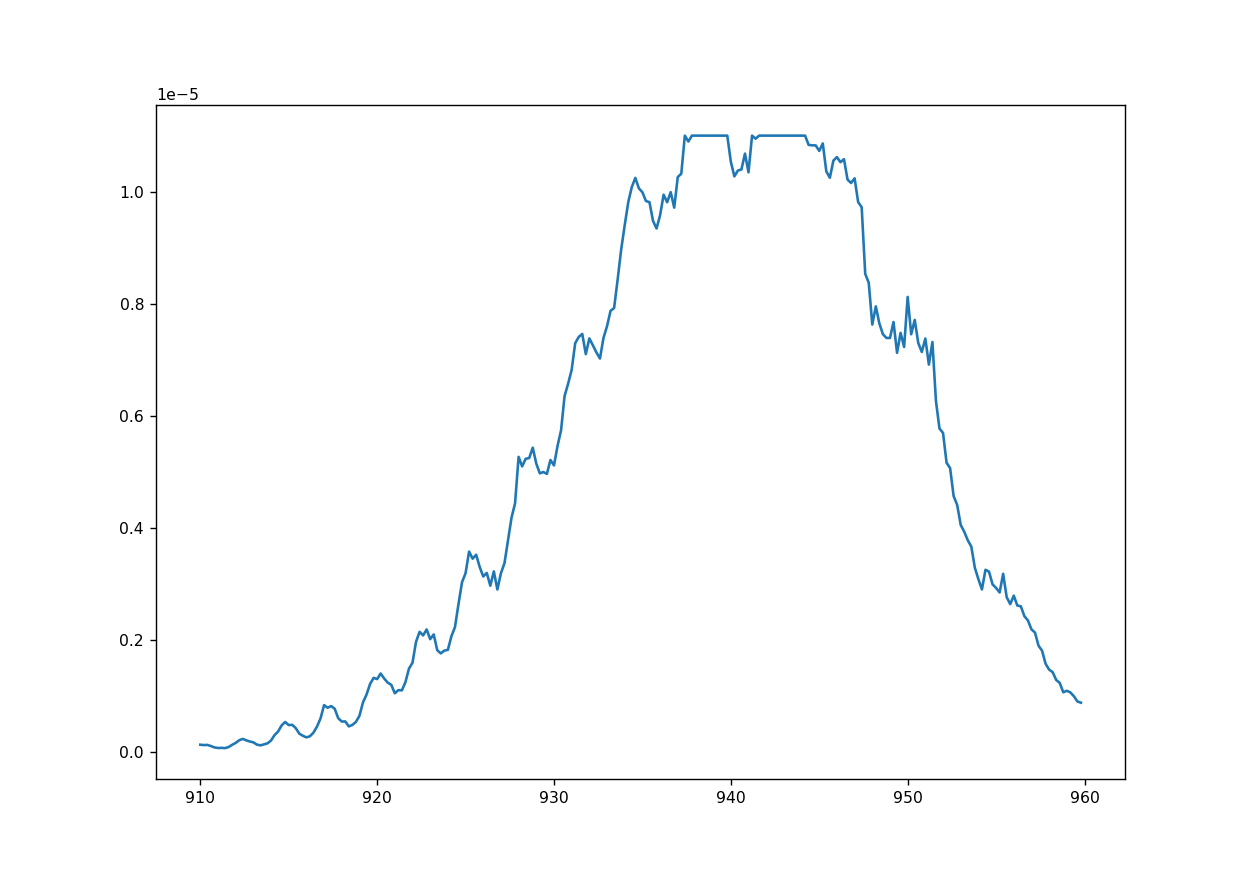

In [143]:
plt.figure(figsize=(10,7))
plt.plot(wavelength, intensity)
plt.savefig('sweep_01nm_910_960_18_03_2023.png')

In [142]:
with DLCpro(NetworkConnection(DLCPRO_CONNECTION)) as dlc:
        change_wavelength(dlc, 925, sleep=10)

        Emission : True
959.8000573992763
924.9995377659523


### Shutdown everything

In [93]:
disable_motor(Device, MST_xy, source, 0x01)
disable_motor(Device, MST_xy, source, 0x02) #second channel(drv) in bay (mst)
disable_motor(Device, MST_z, source, 0x01)

#disable_motor(LST1, motherboard, source, 0x01)
#disable_motor(LST2, motherboard, source, 0x01)

Stage Disabled
Stage Disabled
Stage Disabled


In [11]:
#delete all Device
Device.close()
LST1.close()
LST2.close()
del LST1
del LST2
del Device